<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 5</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

<p>**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)</p>

<p>**Abgabe**: Montag, 6. Juni, 2016 vor der Vorlesung</p>

<p>**Name**: <font color="red">Bitte geben Sie ihren Namen an</font></p>

<p>**Matrikelnummer**: <font color="red">Bitte geben Sie ihre Matrikelnummer an</font></p><br />


<table style="border-style: none; width: 100%; margin-top: 20px; padding: 0px;"
><tr style="border-style: none; margin: 0px; padding: 0px;">
<td style="border-style: none; width: 80%; margin: 0px; padding: 0px; font-size: 20px; font-weight: bold">Relaxen im Plattenkondensator</td>
<td style="border-style: none; width: 20%; margin: 0px; padding: 0px; text-align: right">(5 Punkte)</td></tr></table>



Den Plattenkondensator und sein **elektrisches Feld** haben Sie schon in der einführenden Vorlesung zur Experimentalphysik kennengelernt. Meist wird dabei die Annahme eines homogenen Feldes innerhalb des Kondensators gemacht, so dass die Feldlinien ein gerades Bündel innerhalb des Kondensators formen entsprechend der folgenden Abbildung. 

<img src="http://www.thp.uni-koeln.de/trebst/Lectures/CompPhys-2016/07_capacitor.png" width=300>

In dieser Aufgabe wollen wir überprüfen, in welchem Maße diese Annahme zutreffend ist. Dazu wollen wir das Feld des Plattenkondensators aus der Lösung der **Laplace-Gleichung**

\begin{equation}
\Delta\phi = 0
\end{equation}

numerisch exakt berechnen, etwa indem wir auf die in der Vorlesung vorgestellte **Relaxationsmethode** zurückgreifen. Die Randbedingungen seien dabei so formuliert, dass die beiden Kondensatorplatten auf einem Potential von $+1$ bzw. $-1$ und der Rand der Fläche auf einem Potential von 0 liegt. Um die letzte Randbedingung zu rechtfertigen, müssen die Platten ausreichend weit vom Rand entfernt sein. In der Praxis können Sie die in der folgenden Abbildung dargestellte Konfiguration verwenden:

<img src="http://www.thp.uni-koeln.de/trebst/Lectures/CompPhys-2016/07_cap_geom.png" width=300>

Implementieren Sie den in der Vorlesung vorgestellten Algorithmus für die Laplace-Gleichung mit den Randbedingungen aus der obigen Abbildung. Berechnen Sie dann das resultierende elektrische Feld und stellen Sie dieses mithilfe des *matplotlib* Befehls *quiver* dar. Stimmt diese Feldkonfiguration mit der schematischen Darstellung der ersten Grafik überein? Ordnen Sie die Platten nun näher aneinander an. Wie ändert sich die Feldkonfiguration?

### definitions

In [53]:
### constants
const n       = 10
const delta   = 1/(n-1)
const con_pos = Int(round(n/3)) # position of condenser

### functions
function set_borders(array)
    array[:  , 1  ] = 0
    array[:  , end] = 0
    array[end, :  ] = 0
    array[1  , :  ] = 0
    array[1+con_pos:1+2con_pos, 1+con_pos]  = -1
    array[1+con_pos:1+2con_pos, 1+2con_pos] = 1
    return array
end

function iteration_step(field, borders, h)
    calcpoints = 2:size(field, 1)-1
    output_field = zeros(field)
    for (i, j) in (calcpoints, calcpoints)
        field_vals = field[i+1, j] + field[i-1, j] + field[i, j+1] + field[i, j-1]
        output_field[i, j] = h^2*pi*borders[i, j] + field_vals/4
    end
    return output_field
end

iteration_step (generic function with 2 methods)

### calculations

In [55]:
ρ = set_borders(zeros(n, n))

10x10 Array{Float64,2}:
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  -1.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  -1.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  -1.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  -1.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

### plotting

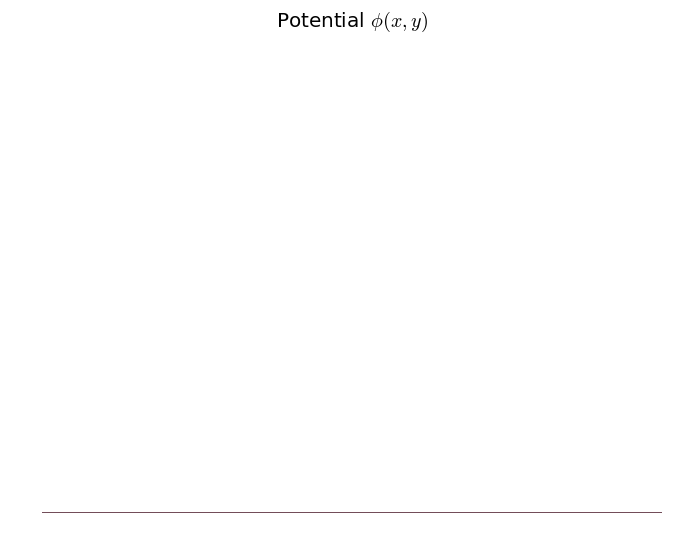

10-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fbafdc953d0>
 PyObject <matplotlib.lines.Line2D object at 0x7fbafdc8add0>
 PyObject <matplotlib.lines.Line2D object at 0x7fbafdc2fe50>
 PyObject <matplotlib.lines.Line2D object at 0x7fbafdc9d050>
 PyObject <matplotlib.lines.Line2D object at 0x7fbafdc9d110>
 PyObject <matplotlib.lines.Line2D object at 0x7fbafdc9df10>
 PyObject <matplotlib.lines.Line2D object at 0x7fbafdc9d910>
 PyObject <matplotlib.lines.Line2D object at 0x7fbafdca6fd0>
 PyObject <matplotlib.lines.Line2D object at 0x7fbafdca6810>
 PyObject <matplotlib.lines.Line2D object at 0x7fbafdca6050>

In [63]:
using PyPlot

figure()
title(L"Potential $\phi(x, y)$")
xlim([0, 1])
ylim([0, 1])
axis("off")
plot(ρ)

### Vektorfelder plotten

Wir möchten kurz erläutern, wie man ein Vektorfeld mit *quiver* darstellen kann. Zunächst müssen wir dazu die $X$ und $Y$ Achse festlegen, was wir den Befehlen *linspace* machen. Stellen Sie sich das so erzeugte Objekt als eindimensionales Koordinatensystem mit Werten zwischen $0$ und $1$ vor. Nun müssen wir daraus ein zweidimensionales Koordinatensystem generieren, allerdings erzeugen wir keine Matrix aus Tupeln $(x, y)$, sondern eine Matrix für die $x$ und eine Matrix für die $y$ Koordinaten. Dementsprechend müssen wir also Matrizen mit gleiche Zeilen bzw. Spalten erzeugen. Am einfachsten geht dies mit dem Befehl *repmat*, dem wir noch mitteilen wie oft ein Array in welcher Dimension wiederholt werden soll. Im gleichen Format, $x$ und $y$ getrennt, werden auch die Daten des Gradienten übergeben, in diesem Fall haben wir einfach $cos$ und $sin$ auf den Definitionsbereich angewandt.

#### quiver syntax

quiver(X, Y, lx, ly, scale=value)
* X: x positions (matrix)
* Y: y positions (matrix)
* lx / ly: length of vector in x- / y-direction (arrays)
* Vector V: points from (X | Y) to (X+x_values | Y+y_values)
* scale=value: zoom in/out of plot (arrows seem to be longer / shorter)

#### example

```julia
using PyPlot

xlim([0, 1])
ylim([0, 1])
xs = collect(linspace(0, 1, 20))
ys = collect(linspace(0, 1, 20))
X = repmat(xs, 1, 20)
Y = repmat(ys', 20, 1) # ys'==transpose(ys)
x_values = cospi(X)
y_values = sinpi(Y)
quiver(X, Y, x_values , y_values, scale=30)
axis("off")
```